## **Assignment 6**
## **Problem statement: Perform handwritten digit classification using SVM model,Neural network model and Logistic Regression model.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [ ]:
data = load_digits()
X = data.data
y = data.target

<Figure size 432x288 with 0 Axes>

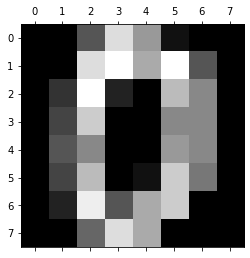

In [ ]:
plt.gray()
plt.matshow(data.images[0])

In [ ]:
X.shape

(1797, 64)

In [ ]:
labels, label_count = np.unique(y, return_counts=True)
print(*zip(labels, label_count))

(0, 178) (1, 182) (2, 177) (3, 183) (4, 181) (5, 182) (6, 181) (7, 179) (8, 174) (9, 180)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Exercise 1: Perform handwritten digit classification using Support Vector Machine (SVM) model. Plot “hyperparameter vs. train-accuracy” and “hyperparameter vs. cv-accuracy” graphs. Measure model performance on test data using following metrics: accuracy, confusion matrix, precision, recall and F1 Score.**

In [ ]:
svm = SVC()
parameters = {'C': [.001, .01, .1, 1, 10, 100], 'gamma': [.001, .01, .1, 1, 10, 100]}
svm_grid = GridSearchCV(estimator=svm, param_grid=parameters, n_jobs=-1, cv=5, return_train_score=True)
svm_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [ ]:
params_list = [str((x['C'], x['gamma'])) for x in svm_grid.cv_results_['params']]
# params_list

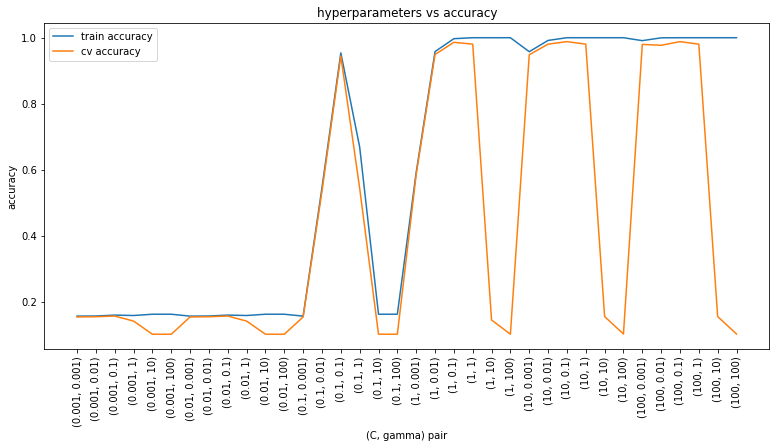

In [ ]:
fig = plt.figure(figsize = (13,6))
plt.title("hyperparameters vs accuracy")
plt.plot(params_list, svm_grid.cv_results_['mean_train_score'], label="train accuracy")
plt.plot(params_list, svm_grid.cv_results_['mean_test_score'], label="cv accuracy")
plt.xlabel("(C, gamma) pair")
plt.ylabel("accuracy")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
print(f"Best score: {svm_grid.best_score_}")
print(f"Best parmeters: {svm_grid.best_params_}")

Best score: 0.9881678281068524
Best parmeters: {'C': 10, 'gamma': 0.1}


In [ ]:
svm_pred = svm_grid.predict(X_test_scaled)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")

Accuracy: 0.9944


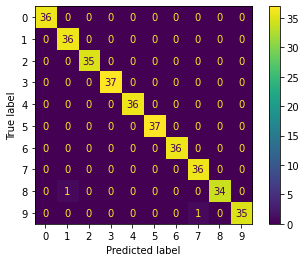

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred, display_labels=svm_grid.classes_)

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.97      0.99        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### **Exercise 2: Perform handwritten digit classification using neural network model with single hidden layer.  Plot “hyperparameter vs. train-accuracy” and “hyperparameter vs. cv-accuracy” graphs. Measure model performance on test data using following metrics: accuracy, confusion matrix, precision, recall and F1 Score.**

In [ ]:
nn = MLPClassifier()
parameters = {'hidden_layer_sizes': [(16,), (32,), (64,), (128,), (256,)], 'alpha': [.0001, .001, .01]}
nn_grid = GridSearchCV(estimator=nn, param_grid=parameters, n_jobs=-1, cv=5, return_train_score=True)
nn_grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(16,), (32,), (64,), (128,),
                                                (256,)]},
             return_train_score=True)

In [ ]:
params_list = [str((x['hidden_layer_sizes'], x['alpha'])) for x in nn_grid.cv_results_['params']]

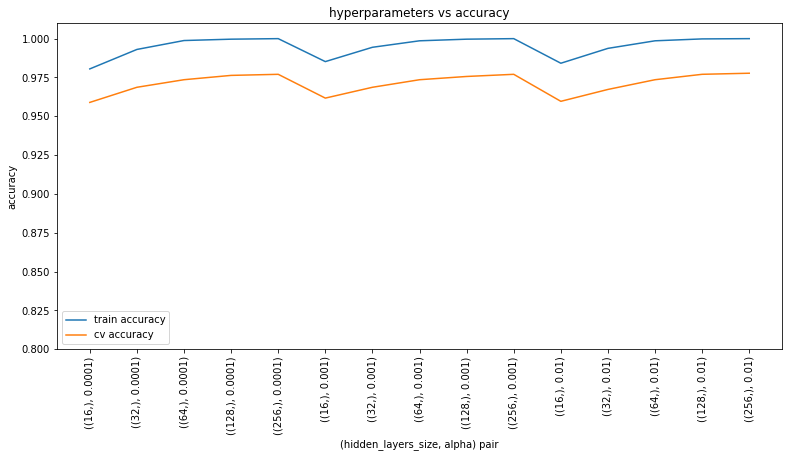

In [ ]:
fig = plt.figure(figsize = (13,6))
plt.title("hyperparameters vs accuracy")
plt.plot(params_list, nn_grid.cv_results_['mean_train_score'], label="train accuracy")
plt.plot(params_list, nn_grid.cv_results_['mean_test_score'], label="cv accuracy")
plt.xlabel("(hidden_layers_size, alpha) pair")
plt.ylabel("accuracy")
plt.xticks(rotation=90)
plt.ylim(0.80, 1.01)
plt.legend()
plt.show()

In [ ]:
print(f"Best score: {nn_grid.best_score_}")
print(f"Best parmeters: {nn_grid.best_params_}")

Best score: 0.9777318041037553
Best parmeters: {'alpha': 0.01, 'hidden_layer_sizes': (256,)}


In [ ]:
nn_pred = nn_grid.predict(X_test_scaled)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, nn_pred):.4f}")

Accuracy: 0.9833


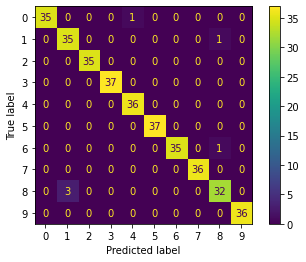

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, nn_pred)

In [ ]:
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.97      0.95        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.94      0.91      0.93        35
           9       1.00      1.00      1.00        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### **Exercise 3: Compare the performances of logistic regression, SVM and neural networks models on MNIST dataset for digit recognition. Write your observation on the performances of these models.**

In [ ]:
lr = LogisticRegression(max_iter=200)
parameters = {'C': [.0001, .001, .01, .1, 1, 10, 100, 1000]}
lr_grid = GridSearchCV(estimator=lr, param_grid=parameters, n_jobs=-1, cv=5, return_train_score=True)
lr_grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [ ]:
params_list = [str(x['C']) for x in lr_grid.cv_results_['params']]

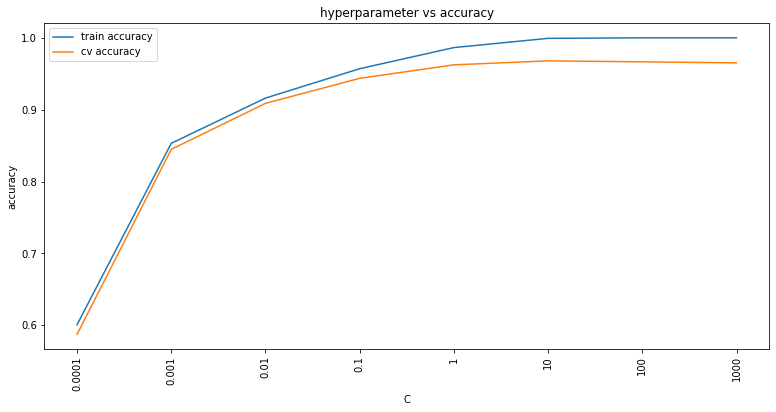

In [ ]:
fig = plt.figure(figsize = (13,6))
plt.title("hyperparameter vs accuracy")
plt.plot(params_list, lr_grid.cv_results_['mean_train_score'], label="train accuracy")
plt.plot(params_list, lr_grid.cv_results_['mean_test_score'], label="cv accuracy")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
print(f"Best score: {lr_grid.best_score_}")
print(f"Best parmeters: {lr_grid.best_params_}")

Best score: 0.967985385210995
Best parmeters: {'C': 10}


In [ ]:
lr_pred = lr_grid.predict(X_test_scaled)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")

Accuracy: 0.9583


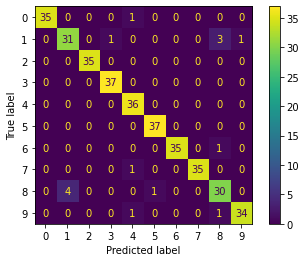

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred)

In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.86      0.87        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.92      1.00      0.96        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       0.97      0.94      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### **Write your observation on the performances of these models.**

- SVM accuracy, 99% > Neural Network accuracy, 98% > Logistic Regression accuracy, 96%.
- The difference in accuracies is marginal, and overall, all models have performed well.

1. SVM
 - High gamma (10 and 100) resulted in overfitting everytime.
 - Low C (.001, .01) resulted in underfittig everytime.
 - Miscalssfied 2 images of different classes. Good precision and recall overall.

2. Neural Network
 - Did not reach convergence in 200 iterations in some cases.
 - Small size of hidden layer resulted in low accuracy, still above 95%.
 - 6 misclassifications, difficulty predicting '8', having low precision.

3. Logistic Regression
 - Did not reach convergence in 200 iterations.
 - 15 misclassifications, confused between '8' and '1', both having low precision and recall.